In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

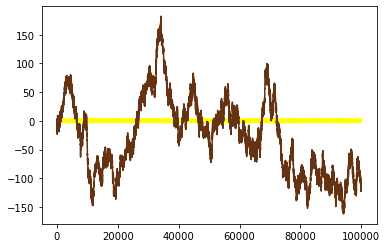

In [3]:
number_of_points = int(1e5)

whitenoise = np.random.randn(number_of_points)
brownnoise = np.cumsum(whitenoise)

plt.plot(whitenoise, color= [1,1,0])
plt.plot(brownnoise, color= [.4,.2,.07])

plt.show()

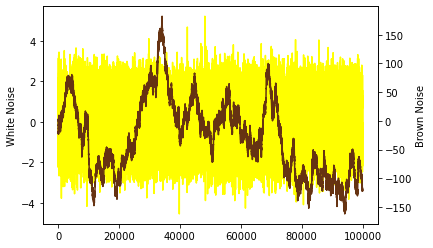

In [4]:
fig, ax = plt.subplots(1)

ax.plot(whitenoise, color= [1, 1, 0])
ax.set_ylabel('White Noise')

ax2 = ax.twinx()       # They are going to share X axis, they are going to have own unique Y axis
ax2.plot(brownnoise, color= [.4, .2, .07])
ax2.set_ylabel('Brown Noise')

plt.show()

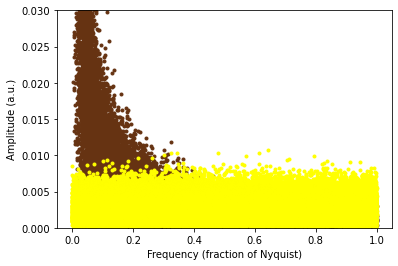

In [14]:
whitenoiseSpectral = np.abs(fftpack.fft(whitenoise)) / number_of_points # we just want magnitutes
brownnoiseSpectral = np.abs(fftpack.fft(brownnoise)) / number_of_points

# vector of frequencies

frex= np.linspace(0, 1, int(number_of_points/2 +1))

plt.plot(frex, brownnoiseSpectral[:len(frex)], '.', color= [.4, .2, .07])
plt.plot(frex, whitenoiseSpectral[:len(frex)], '.', color= [1, 1, 0])
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.ylim([0,.03])

plt.show()

In [15]:
# Pink and blue noise

In [17]:
# inverse fourier transform

In [20]:
# pink noise

fc_amp = 1 / (frex +.01) + np.random.randn(int(number_of_points/2+1))**2*5 # for small off set (frex+0.01)
fc_phs = 2*np.pi * np.random.randn(int(number_of_points/2+1))

FourierSpect = np.zeros(number_of_points, dtype=complex)
FourierSpect[:int(number_of_points/2+1)] = fc_amp * np.exp(1j*fc_phs) #phs coeffient phases 1j square root of -1

pinkNoise = np.real(fftpack.ifft(FourierSpect))


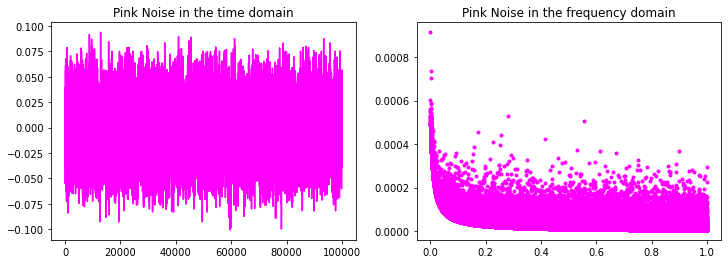

In [27]:
pinkNoiseSpectral = np.abs(fftpack.fft(pinkNoise)) / number_of_points
    
fig, ax = plt.subplots(1, 2, figsize= (12,4))

ax[0].plot(pinkNoise, color= [1,0,1])
ax[0].set_title('Pink Noise in the time domain')

ax[1].plot(frex, pinkNoiseSpectral[:len(frex)], '.', color=[1,0,1])
ax[1].set_title('Pink Noise in the frequency domain')

plt.show()

In [34]:
# blue noise

fc_amp = np.linspace(1, 3, int(number_of_points/2+1)) + np.random.randn(int(number_of_points/2+1))/5 # for small off set (frex+0.01)
fc_phs = 2*np.pi * np.random.randn(int(number_of_points/2+1))

FourierSpect = np.zeros(number_of_points, dtype=complex)
FourierSpect[:int(number_of_points/2+1)] = fc_amp * np.exp(1j*fc_phs) #phs coeffient phases 1j square root of -1

blueNoise = np.real(fftpack.ifft(FourierSpect))

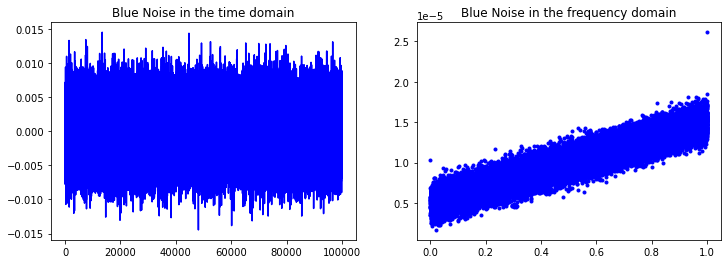

In [35]:
blueNoiseSpectral = np.abs(fftpack.fft(blueNoise)) / number_of_points
    
fig, ax = plt.subplots(1, 2, figsize= (12,4))

ax[0].plot(blueNoise, color= [0,0,1])
ax[0].set_title('Blue Noise in the time domain')

ax[1].plot(frex, blueNoiseSpectral[:len(frex)], '.', color=[0,0,1])
ax[1].set_title('Blue Noise in the frequency domain')

plt.show()

In [36]:
# The colorful spectrum of the rainbow

In [37]:
def whiteNoiseSpect(amp):
    noise = amp * np.random.randn(number_of_points)
    return abs(fftpack.fft(noise)/number_of_points)

def brownNoiseSpect(amp):
    noise = np.cumsum(amp*np.random.randn(number_of_points))
    return abs(fftpack.fft(noise)/number_of_points)

def pinkNoiseSpect(amp):
    FourierSpect = np.zeros(number_of_points, dtype= complex)
    fc_amp = 1 / (frex+0.01) +np.random.randn(int(number_of_points/2+1))**2*5
    fc_phs = 2*np.pi * np.random.rand(int(number_of_points/2+1))
    FourierSpect[:int(number_of_points/2+1)] = fc_amp *np.exp(1j*fc_phs)
    noise = amp * np.real(fftpack.ifft(FourierSpect))
    return abs(fftpack.fft(noise / number_of_points))

def blueNoiseSpect(amp):
    FourierSpect = np.zeros(number_of_points, dtype = complex)
    fc_amp = np.linspace(1, 3, int(number_of_points/2+1)) + np.random.randn(int(number_of_points/2+1))
    fc_phs = 2*np.pi*np.random.rand(int(number_of_points/2+1))
    FourierSpect[:int(number_of_points/2+1)] = fc_amp*np.exp(1j*fc_phs)
    noise = amp * np.real(fftpack.ifft(FourierSpect))
    return abs(fftpack.fft(noise / number_of_points))

ValueError: x and y must have same first dimension, but have shapes (50001,) and (100000,)

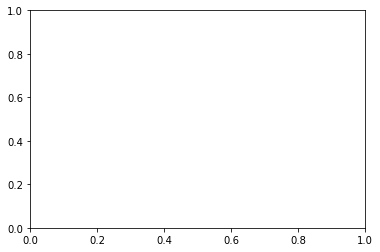

In [38]:
plt.plot(frex, whiteNoiseSpect(1))

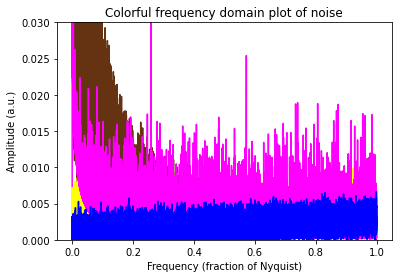

In [54]:
plt.plot(frex, brownNoiseSpect(1)[:len(frex)], color = [.4,.2,.07])
plt.plot(frex, whiteNoiseSpect(1)[:len(frex)], color = [1,1,0])
plt.plot(frex, pinkNoiseSpect(50)[:len(frex)], color = [1,0,1])
plt.plot(frex, blueNoiseSpect(200)[:len(frex)], color = [0,0,1])

plt.ylim([0,.03])
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Colorful frequency domain plot of noise')
plt.show()